In [1]:
import tensorflow as tf

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
## import dataset
df = pd.read_csv('./data/exoplanets-clean.csv')

null_col_vals = df.isnull().sum().to_dict()
NUM_ROWS = df.shape[0]

thresholdAmount = 0.3 * NUM_ROWS

dropped = []
for key in null_col_vals:
    if(null_col_vals[key] >= thresholdAmount):
        dropped.append(key)

df = df.drop(columns=dropped, axis=1)
df = df.dropna()
df.head()

,num_stars,single_planet_exosystem,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
30,3,True,Imaging,2015,Gemini Observatory,0,11688.000000,6209.250000,-3287.250000,0.0,...,-0.120300,5.21149,0.023,-0.023,4.537,0.024,-0.024,5.15806,0.002308,-0.002308
32,2,False,Radial Velocity,1996,Lick Observatory,0,14.651600,0.000100,-0.000100,0.0,...,-0.012300,5.95084,0.023,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852
35,2,False,Radial Velocity,2004,McDonald Observatory,0,0.736547,0.000001,-0.000001,0.0,...,-0.012300,5.95084,0.023,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852
52,1,False,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),0,8.463080,0.000060,-0.000060,0.0,...,-0.004625,8.81000,0.100,-0.100,4.529,0.020,-0.020,7.84038,0.000731,-0.000731
53,1,False,Transit,2021,Transiting Exoplanet Survey Satellite (TESS),0,18.859690,0.000080,-0.000080,0.0,...,-0.004625,8.81000,0.100,-0.100,4.529,0.020,-0.020,7.84038,0.000731,-0.000731


In [4]:
attr= pd.get_dummies(df.drop(columns=['single_planet_exosystem'],axis=1), drop_first=True)
target = pd.get_dummies(df['single_planet_exosystem'],prefix='ouput')
print(attr.shape)
print(target.shape)
attr.head()
# target.head()

(3082, 101)
(3082, 2)


,num_stars,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxlim,pl_rade,...,disc_facility_TrES,disc_facility_Transiting Exoplanet Survey Satellite (TESS),disc_facility_United Kingdom Infrared Telescope,disc_facility_W. M. Keck Observatory,disc_facility_WASP-South,disc_facility_XO,pl_bmassprov_Mass,pl_bmassprov_Msin(i)/sin(i),pl_bmassprov_Msini,st_metratio_[M/H]
30,3,2015,0,11688.000000,6209.250000,-3287.250000,0.0,13.20000,0.0,13.400,...,False,False,False,False,False,False,True,False,False,True
32,2,1996,0,14.651600,0.000100,-0.000100,0.0,0.11340,0.0,13.900,...,False,False,False,False,False,False,True,False,False,False
35,2,2004,0,0.736547,0.000001,-0.000001,0.0,0.01544,0.0,1.875,...,False,False,False,False,False,False,True,False,False,False
52,1,2020,0,8.463080,0.000060,-0.000060,0.0,0.06490,0.0,3.957,...,False,True,False,False,False,False,True,False,False,False
53,1,2021,0,18.859690,0.000080,-0.000080,0.0,0.11080,0.0,2.522,...,False,True,False,False,False,False,True,False,False,False


In [5]:
attr.head()

,num_stars,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxlim,pl_rade,...,disc_facility_TrES,disc_facility_Transiting Exoplanet Survey Satellite (TESS),disc_facility_United Kingdom Infrared Telescope,disc_facility_W. M. Keck Observatory,disc_facility_WASP-South,disc_facility_XO,pl_bmassprov_Mass,pl_bmassprov_Msin(i)/sin(i),pl_bmassprov_Msini,st_metratio_[M/H]
30,3,2015,0,11688.000000,6209.250000,-3287.250000,0.0,13.20000,0.0,13.400,...,False,False,False,False,False,False,True,False,False,True
32,2,1996,0,14.651600,0.000100,-0.000100,0.0,0.11340,0.0,13.900,...,False,False,False,False,False,False,True,False,False,False
35,2,2004,0,0.736547,0.000001,-0.000001,0.0,0.01544,0.0,1.875,...,False,False,False,False,False,False,True,False,False,False
52,1,2020,0,8.463080,0.000060,-0.000060,0.0,0.06490,0.0,3.957,...,False,True,False,False,False,False,True,False,False,False
53,1,2021,0,18.859690,0.000080,-0.000080,0.0,0.11080,0.0,2.522,...,False,True,False,False,False,False,True,False,False,False


In [6]:
## convert the data frames to arrays
X=attr.values
Y=target.values

In [7]:
 #creating test and training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=100)
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=.20,random_state=100)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2465, 101)
(2465, 2)
(617, 101)
(617, 2)


In [8]:
print(x_train.shape[1])
print(y_train.shape)

101
(2465, 2)


In [9]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

dropout_rate = 0.1
epochs = 50
batch_size = 1
learn_rate = 0.001

model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(36, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(24, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(12, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(6, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(y_train.shape[1], activation='softmax'))

adam = Adam(learning_rate=learn_rate)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])



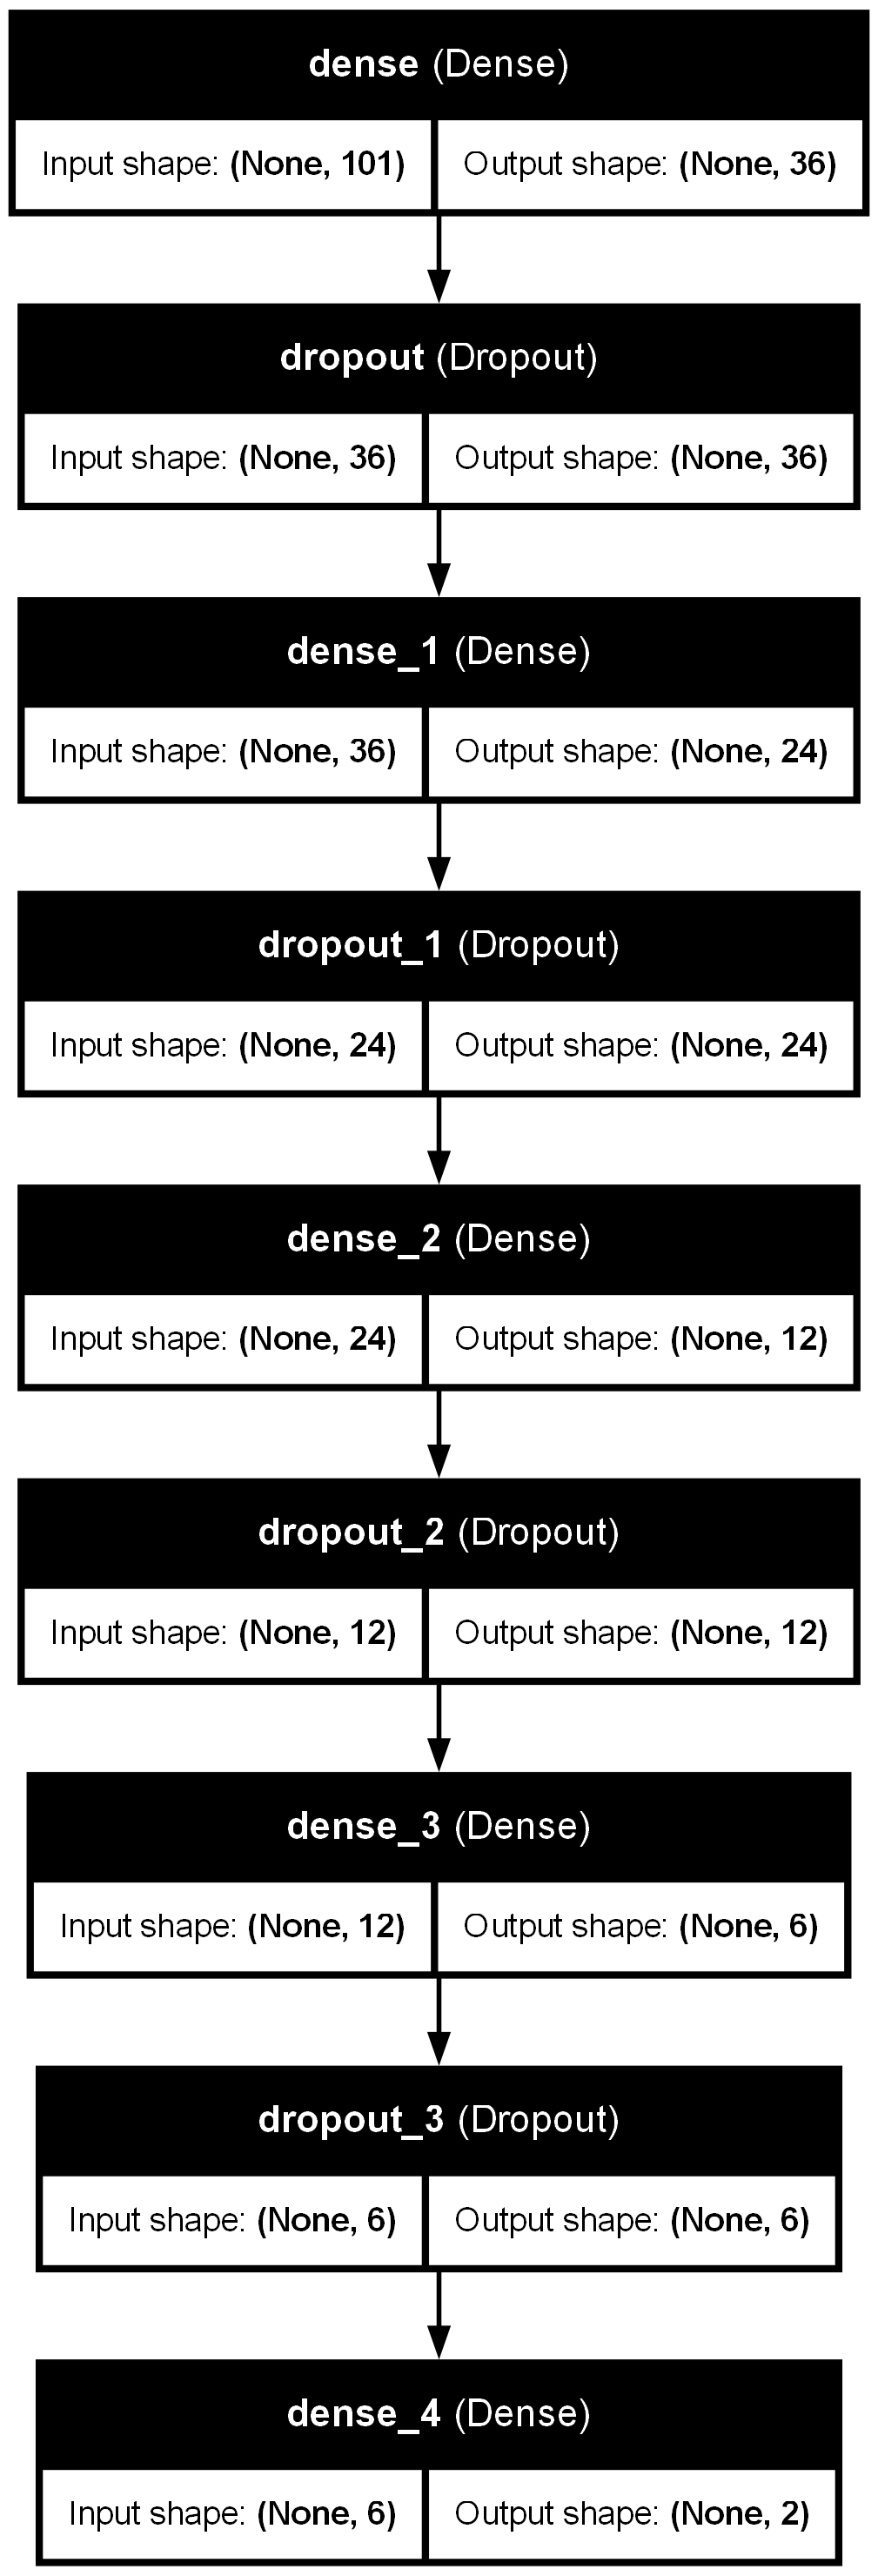

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model_plot1.png',show_shapes=True, show_layer_names=True)

In [11]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [12]:
model_history = model.fit(x_train,y_train, batch_size=batch_size,epochs=epochs,validation_split=.2,verbose=1)

Epoch 1/50
1972/1972 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7596 - loss: 0.5622 - val_accuracy: 0.8154 - val_loss: 0.4044
Epoch 2/50
1972/1972 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8206 - loss: 0.4136 - val_accuracy: 0.8235 - val_loss: 0.3642
Epoch 3/50
1972/1972 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8384 - loss: 0.3790 - val_accuracy: 0.8073 - val_loss: 0.3648
Epoch 4/50
1972/1972 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8181 - loss: 0.3933 - val_accuracy: 0.8377 - val_loss: 0.3552
Epoch 5/50
1972/1972 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8396 - loss: 0.3613 - val_accuracy: 0.8296 - val_loss: 0.3800
Epoch 6/50
1972/1972 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8651 - loss: 0.3284 - val_accuracy: 0.8235 - val_loss: 0.3913
Epoch 7/50
1972/1972 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8542 - loss: 0.3349 - val_accuracy: 0.8499 - val_loss: 0.3693
Epoch 8/50
1972/1972 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8539 - loss: 0.3315 - 

In [ ]:
accuracies = model.evaluate(x_test, y_test, verbose=1)
print("Test score:", accuracies[0])
print("Test Accuracy;", accuracies[1])

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8303 - loss: 0.7898
Test score: 0.8705450296401978
Test Accuracy; 0.8184764981269836
